In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Mall_Customers.csv')
df = df.rename(columns = {'Annual Income (k$)':'Annual Income',
                         'Spending Score (1-100)':'Spending Score'})

df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [69]:
# delete id
del df['CustomerID']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
Gender            200 non-null object
Age               200 non-null int64
Annual Income     200 non-null int64
Spending Score    200 non-null int64
dtypes: int64(3), object(1)
memory usage: 6.3+ KB


In [70]:
df.describe()

,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [71]:
# check the missing value
df.isnull().sum()

Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

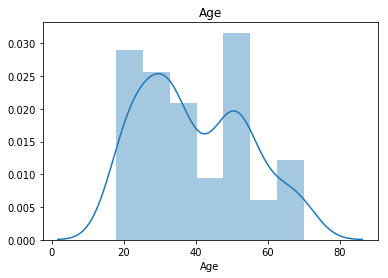

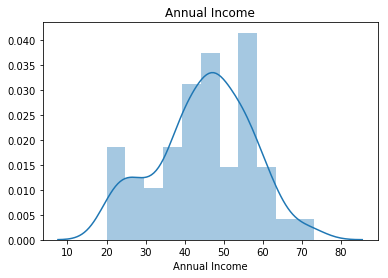

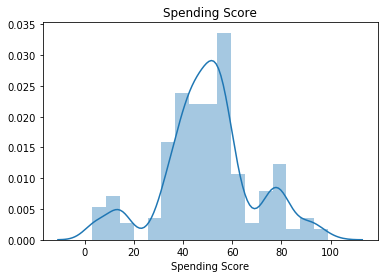

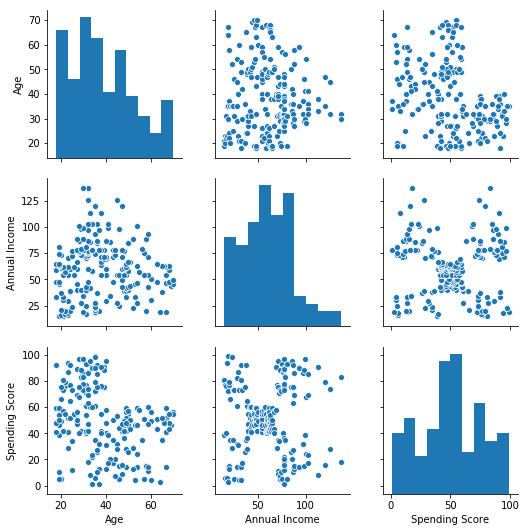

In [72]:
numerical_feature = [col for col in df.columns if df[col].dtypes == 'int64']
for col in numerical_feature:
    sns.distplot(df.loc[df[col], col])
    plt.title(col)
    plt.show()
    
sns.pairplot(df[numerical_feature], x_vars = numerical_feature, y_vars=numerical_feature)
plt.show()

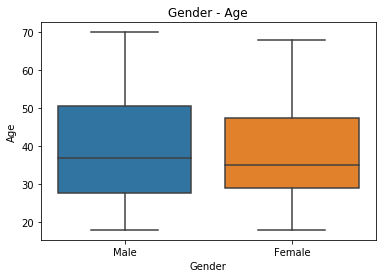

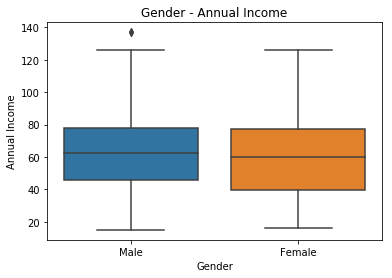

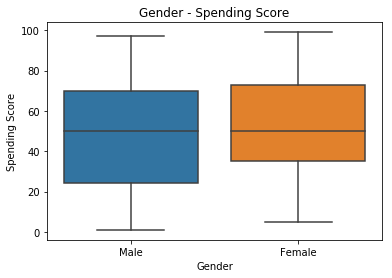

In [73]:
for col in numerical_feature:
    sns.boxplot(x='Gender', y = col, data = df)
    plt.title('Gender - {}' .format(col))
    plt.show()


In [74]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])

df.head()

,Gender,Age,Annual Income,Spending Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [80]:
# from sklearn.cluster import DBSCAN

# model = DBSCAN(min_samples=3)
# predict = pd.DataFrame(model.fit_predict(df))
# predict.columns=['predict']

# r = pd.concat([df, predict], axis=1)

# r.head()

# print(r['predict'].unique())

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0).fit_predict(df)
cluster = pd.DataFrame(kmeans, columns=['cluster'])

result = pd.concat([df, cluster], axis = 1)


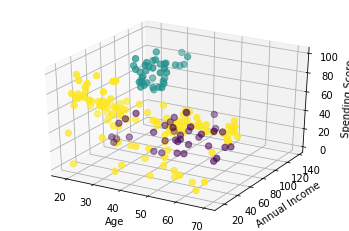

In [83]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['Age'], result['Annual Income'],result['Spending Score'], c = result['cluster'], s = 40)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()

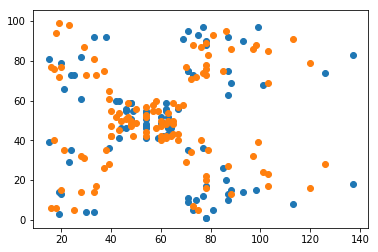

In [87]:
for gen in result['Gender'].unique():
    gender_fix_data = result[result['Gender']==gen]
    plt.scatter(gender_fix_data['Annual Income'], gender_fix_data['Spending Score'])
    